In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [2]:
df = pd.read_csv('delta_public_00_12.csv',encoding='latin1', low_memory = False)

In [3]:
df.shape

(87560, 974)

In [4]:
df_subset = df[['bachelordegrees','sector','flagship','state03',
                'private03','edactivity03','unrestricted_revenue','appliedaid01',
                'grant01','grant02','grant03','grant05','grant06','grant07',
                'institutional_grant_aid',
               'any_aid_num','loan_num','acadsupp01','acadsupp01_fasb','acadsupp02','studserv01',
               'studserv01_fasb','ftretention_rate','total_enrollment_amin_tot',
               'dependent1']]
df_subset

,bachelordegrees,sector,flagship,state03,private03,edactivity03,unrestricted_revenue,appliedaid01,grant01,grant02,...,any_aid_num,loan_num,acadsupp01,acadsupp01_fasb,acadsupp02,studserv01,studserv01_fasb,ftretention_rate,total_enrollment_amin_tot,dependent1
0,20.0,3,0,NaN,NaN,NaN,2895011.0,20138.0,1046625.0,211276.0,...,12.0,12.0,NaN,NaN,NaN,882337.717575,NaN,1.00,3.0,NaN
1,NaN,9,0,NaN,9000.0,NaN,947300.0,196340.0,198269.0,NaN,...,19.0,15.0,NaN,NaN,NaN,106040.267022,NaN,0.69,0.0,NaN
2,516.0,2,0,NaN,NaN,NaN,21079005.0,2067400.0,4390892.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN
3,NaN,9,0,NaN,NaN,NaN,699988.0,NaN,393685.0,NaN,...,13.0,13.0,NaN,NaN,NaN,NaN,NaN,0.84,0.0,NaN
4,NaN,6,0,NaN,NaN,NaN,1130401.0,18397.0,361836.0,11101.0,...,101.0,96.0,NaN,NaN,NaN,867440.029060,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87555,23.0,3,0,NaN,NaN,NaN,5033370.0,74168.0,1306516.0,42408.0,...,33.0,28.0,NaN,NaN,NaN,795911.296036,NaN,0.50,1.0,NaN
87556,29.0,3,0,NaN,NaN,NaN,8864391.0,261221.0,1070872.0,33008.0,...,21.0,17.0,NaN,NaN,NaN,452589.373268,NaN,0.58,1.0,NaN
87557,3.0,3,0,NaN,NaN,NaN,1627658.0,60055.0,382504.0,18250.0,...,10.0,10.0,NaN,NaN,NaN,157952.111494,NaN,0.50,1.0,NaN
87558,8.0,3,0,NaN,NaN,NaN,2165955.0,72265.0,514270.0,15968.0,...,11.0,10.0,NaN,NaN,NaN,549126.810692,NaN,0.75,0.0,NaN


In [5]:
corr = df_subset.corr()
corr.style.background_gradient(cmap='coolwarm')
#removed variables with extremely low correlation with target

,bachelordegrees,sector,flagship,state03,private03,edactivity03,unrestricted_revenue,appliedaid01,grant01,grant02,grant03,grant05,grant06,grant07,institutional_grant_aid,any_aid_num,loan_num,acadsupp01,acadsupp01_fasb,acadsupp02,studserv01,studserv01_fasb,ftretention_rate,total_enrollment_amin_tot,dependent1
bachelordegrees,1.000000,-0.283102,0.443612,0.864964,0.332659,0.323833,0.655382,0.640379,0.611473,0.436294,0.597934,0.373139,0.383406,0.717420,0.462386,0.720123,0.537300,0.642740,0.606254,0.627899,0.735065,0.707862,0.181474,0.318982,0.499271
sector,-0.283102,1.000000,-0.054644,-0.333257,-0.118081,-0.134536,-0.215602,-0.252817,-0.170538,-0.143850,-0.181949,-0.134074,-0.167137,-0.259430,-0.196535,-0.207156,-0.152774,-0.188528,-0.139860,-0.174392,-0.288265,-0.188928,0.115099,-0.145687,-0.117829
flagship,0.443612,-0.054644,1.000000,0.473107,0.166878,0.161924,0.314704,0.244463,0.135514,0.208465,0.156326,0.217385,0.173717,0.264725,0.225574,0.298521,0.210142,0.344756,0.309658,0.348759,0.277044,0.259686,0.076598,0.254484,0.130323
state03,0.864964,-0.333257,0.473107,1.000000,0.347645,0.302491,0.794386,0.618925,0.622737,0.455711,0.595245,0.494001,0.298103,0.663943,0.384363,0.819978,0.687358,0.688815,0.618852,0.654239,0.764361,0.741337,0.280724,0.277188,0.594799
private03,0.332659,-0.118081,0.166878,0.347645,1.000000,0.665106,0.680875,0.684921,0.105963,0.498024,0.130238,0.757803,0.613149,0.622183,0.739227,0.260336,0.275448,0.614204,0.635242,0.558508,0.565860,0.598809,0.249312,0.070490,0.086102
edactivity03,0.323833,-0.134536,0.161924,0.302491,0.665106,1.000000,0.511038,0.525025,0.162503,0.554708,0.192033,0.528459,0.448568,0.502227,0.548336,0.213131,0.170266,0.622805,0.622196,0.570620,0.491149,0.490302,0.106522,0.116991,0.091147
unrestricted_revenue,0.655382,-0.215602,0.314704,0.794386,0.680875,0.511038,1.000000,0.734206,0.420916,0.476604,0.399443,0.609942,0.475305,0.709133,0.605225,0.505994,0.381947,0.674233,0.639155,0.637592,0.717183,0.681415,0.128762,0.220773,0.344858
appliedaid01,0.640379,-0.252817,0.244463,0.618925,0.684921,0.525025,0.734206,1.000000,0.412961,0.512947,0.452800,0.646302,0.897593,0.910636,0.929439,0.504536,0.347252,0.676414,0.699408,0.624775,0.789647,0.821995,0.252429,0.166941,0.340611
grant01,0.611473,-0.170538,0.135514,0.622737,0.105963,0.162503,0.420916,0.412961,1.000000,0.463574,0.437717,0.155178,0.173245,0.661221,0.204971,0.714073,0.557924,0.375054,0.349018,0.364241,0.595971,0.534241,-0.046916,0.322880,0.845664
grant02,0.436294,-0.143850,0.208465,0.455711,0.498024,0.554708,0.476604,0.512947,0.463574,1.000000,0.231727,0.508765,0.329034,0.564694,0.397996,0.333281,0.270215,0.496965,0.463771,0.490092,0.511559,0.520263,0.100577,0.173946,0.237733


In [6]:
df_subset.isnull().sum()

bachelordegrees              33720
sector                           0
flagship                         0
state03                      65089
private03                    51139
edactivity03                 60060
unrestricted_revenue         12374
appliedaid01                 40303
grant01                      17895
grant02                      34563
grant03                      41976
grant05                      57135
grant06                      56860
grant07                      13987
institutional_grant_aid      40362
any_aid_num                  18846
loan_num                     18885
acadsupp01                   45428
acadsupp01_fasb              59906
acadsupp02                   50719
studserv01                   19328
studserv01_fasb              59657
ftretention_rate             43293
total_enrollment_amin_tot    11291
dependent1                   55286
dtype: int64

In [7]:
df_subset = df_subset.dropna(subset=['bachelordegrees'],how='all')
df_subset = df_subset.dropna(subset=['state03'],how='all')
df_subset.isnull().sum()

bachelordegrees                  0
sector                           0
flagship                         0
state03                          0
private03                     4376
edactivity03                 11528
unrestricted_revenue             0
appliedaid01                  4451
grant01                        389
grant02                       1518
grant03                       2667
grant05                       5195
grant06                       3607
grant07                         84
institutional_grant_aid       1975
any_aid_num                    690
loan_num                       695
acadsupp01                     602
acadsupp01_fasb              12051
acadsupp02                    4447
studserv01                     335
studserv01_fasb              12064
ftretention_rate              8409
total_enrollment_amin_tot       41
dependent1                    4048
dtype: int64

In [8]:
df_subset.shape

(15972, 25)

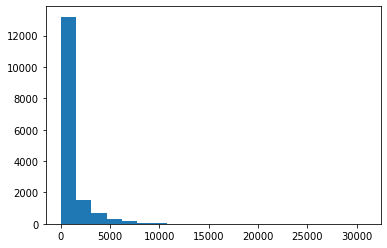

In [9]:
x = df_subset[['bachelordegrees']]
plt.hist(x, bins = 20)
plt.show()

In [10]:
imp = IterativeImputer(max_iter = 30, initial_strategy='median',
                      imputation_order = 'roman',sample_posterior=False)
df_mice = imp.fit_transform(df_subset)
scaler = StandardScaler()
df_mice = scaler.fit_transform(df_mice)
df_mice = pd.DataFrame(df_mice, columns = ['bachelordegrees','sector','flagship','state03',
                'private03','edactivity03','unrestricted_revenue','appliedaid01',
                'grant01','grant02','grant03','grant05','grant06','grant07',
                'institutional_grant_aid',
               'any_aid_num','loan_num','acadsupp01','acadsupp01_fasb','acadsupp02','studserv01',
               'studserv01_fasb','ftretention_rate','total_enrollment_amin_tot',
               'dependent1'])
df_mice

C:\Users\Jagos\miniconda3\envs\dsda\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,bachelordegrees,sector,flagship,state03,private03,edactivity03,unrestricted_revenue,appliedaid01,grant01,grant02,...,any_aid_num,loan_num,acadsupp01,acadsupp01_fasb,acadsupp02,studserv01,studserv01_fasb,ftretention_rate,total_enrollment_amin_tot,dependent1
0,-0.472282,-0.388621,-0.197223,-0.448377,-0.226208,-0.147643,-0.447012,-0.331050,-0.437377,-0.250356,...,-0.430831,-0.329016,-0.381731,-0.382194,-0.367817,-0.537373,-0.546777,-0.094636,-0.331740,-0.412021
1,-0.487343,-0.388621,-0.197223,-0.448369,-0.226311,-0.147829,-0.445136,-0.331888,-0.439414,-0.268806,...,-0.437858,-0.338579,-0.379107,-0.379757,-0.365539,-0.541495,-0.550528,-0.102732,-0.340265,-0.410844
2,-0.487343,-0.388621,-0.197223,-0.448374,-0.226213,-0.147857,-0.442136,-0.327542,-0.453858,-0.187388,...,-0.443557,-0.336762,-0.379242,-0.379883,-0.365382,-0.553488,-0.561441,-0.092005,-0.344527,-0.424526
3,-0.480391,-0.388621,-0.197223,-0.448389,-0.226091,-0.147869,-0.441712,-0.322764,-0.439108,-0.283695,...,-0.434193,-0.333705,-0.377496,-0.378261,-0.365381,-0.550334,-0.558570,-0.096416,-0.344527,-0.412300
4,-0.479812,-0.388621,-0.197223,-0.448370,-0.226172,-0.148028,-0.441934,-0.317038,-0.439149,-0.278560,...,-0.433208,-0.333090,-0.379506,-0.380127,-0.365388,-0.546667,-0.555234,-0.094238,-0.344527,-0.412188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,-0.487343,0.739627,-0.197223,0.257546,-0.199327,-0.193969,-0.017805,-0.250762,0.260893,-0.042078,...,-0.324735,-0.600916,0.089420,0.092397,0.094679,0.272127,0.267209,-0.486953,1.390289,0.792075
15968,-0.487343,0.739627,-0.197223,0.040064,-0.192801,-0.189313,-0.064134,-0.283593,0.337644,0.050572,...,-0.344890,-0.598064,0.156973,0.159374,0.203269,0.287042,0.277306,-0.558064,1.091918,0.667218
15969,-0.487343,0.739627,-0.197223,-0.059372,-0.190670,-0.207152,-0.064891,-0.230242,0.336785,-0.001453,...,-0.310007,-0.583804,0.141744,0.145014,0.196696,0.269414,0.260759,-0.017272,0.682723,0.815197
15970,-0.487343,0.739627,-0.197223,0.196922,-0.224418,-0.177122,0.040458,-0.157536,0.468202,0.032305,...,0.191534,-0.583804,0.213279,0.218320,0.244450,0.341179,0.333718,-0.017272,0.678460,0.980132


In [11]:
knn=KNNImputer()
df_knn = knn.fit_transform(df_subset)
df_knn =  scaler.fit_transform(df_knn)
df_knn = pd.DataFrame(df_knn, columns = ['bachelordegrees','sector','flagship','state03',
                'private03','edactivity03','unrestricted_revenue','appliedaid01',
                'grant01','grant02','grant03','grant05','grant06','grant07',
                'institutional_grant_aid',
               'any_aid_num','loan_num','acadsupp01','acadsupp01_fasb','acadsupp02','studserv01',
               'studserv01_fasb','ftretention_rate','total_enrollment_amin_tot',
               'dependent1'])
df_knn

,bachelordegrees,sector,flagship,state03,private03,edactivity03,unrestricted_revenue,appliedaid01,grant01,grant02,...,any_aid_num,loan_num,acadsupp01,acadsupp01_fasb,acadsupp02,studserv01,studserv01_fasb,ftretention_rate,total_enrollment_amin_tot,dependent1
0,-0.472282,-0.388621,-0.197223,-0.448377,-0.232986,-0.193148,-0.447012,-0.395485,-0.419047,-0.255645,...,-0.457811,-0.610990,-0.378792,-0.391812,-0.365669,-0.532657,-0.544835,0.257714,-0.331459,-0.406442
1,-0.487343,-0.388621,-0.197223,-0.448369,-0.233090,-0.193329,-0.445136,-0.396492,-0.428534,-0.274090,...,-0.574142,-0.581185,-0.376170,-0.389405,-0.363398,-0.536770,-0.548538,-0.125058,-0.339983,-0.403474
2,-0.487343,-0.388621,-0.197223,-0.448374,-0.232991,-0.193357,-0.442136,-0.391269,-0.436704,-0.213165,...,-0.608485,-0.582604,-0.376305,-0.389528,-0.363241,-0.548738,-0.559311,0.625764,-0.344245,-0.407630
3,-0.480391,-0.388621,-0.197223,-0.448389,-0.232868,-0.193368,-0.441712,-0.385525,-0.425858,-0.288975,...,-0.582496,-0.540309,-0.374560,-0.387926,-0.363240,-0.545590,-0.556477,0.434378,-0.344245,-0.396349
4,-0.479812,-0.388621,-0.197223,-0.448370,-0.232950,-0.193524,-0.441934,-0.378643,-0.429608,-0.283841,...,-0.602916,-0.571534,-0.376568,-0.389770,-0.363247,-0.541931,-0.553183,-0.360611,-0.344245,-0.386256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,-0.487343,0.739627,-0.197223,0.257546,-0.188611,-0.095625,-0.017805,-0.220895,0.259714,-0.047424,...,-0.328486,-0.600771,0.092018,-0.075162,0.038715,0.275095,0.205748,0.507988,1.390380,1.066956
15968,-0.487343,0.739627,-0.197223,0.040064,0.000198,-0.170704,-0.064134,-0.338443,0.336497,0.045201,...,-0.348596,-0.597933,0.159524,0.031349,0.203953,0.289978,0.533669,-0.390055,1.092042,0.906654
15969,-0.487343,0.739627,-0.197223,-0.059372,-0.111357,0.029957,-0.064891,-0.274318,0.335638,-0.006810,...,-0.313790,-0.583740,0.144305,-0.028184,0.197396,0.272388,0.518752,0.007440,0.682892,1.096642
15970,-0.487343,0.739627,-0.197223,0.196922,-0.098826,-0.127508,0.040458,-0.186928,0.467111,0.026939,...,0.186650,-0.583740,0.215789,0.071412,0.245029,0.343999,0.468214,0.007440,0.678630,1.308400


In [12]:
y = df_mice[['bachelordegrees']]
X = df_mice[['sector','flagship','state03',
                'private03','edactivity03','unrestricted_revenue','appliedaid01',
                'grant01','grant02','grant03','grant05','grant06','grant07',
                'institutional_grant_aid',
               'any_aid_num','loan_num','acadsupp01','acadsupp01_fasb','acadsupp02','studserv01',
               'studserv01_fasb','ftretention_rate','total_enrollment_amin_tot',
               'dependent1']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2)
rfecv = RFECV(estimator=RandomForestRegressor(),min_features_to_select=5,step=5, n_jobs=-1, scoring="r2",
cv=5,)
_ = rfecv.fit(X_train, y_train.values.ravel())
X_train.columns[rfecv.support_]

Index(['sector', 'flagship', 'state03', 'private03', 'edactivity03',
       'unrestricted_revenue', 'appliedaid01', 'grant01', 'grant02', 'grant03',
       'grant05', 'grant06', 'grant07', 'institutional_grant_aid',
       'any_aid_num', 'loan_num', 'acadsupp01', 'acadsupp01_fasb',
       'acadsupp02', 'studserv01', 'studserv01_fasb', 'ftretention_rate',
       'total_enrollment_amin_tot', 'dependent1'],
      dtype='object')

In [13]:
y = df_knn[['bachelordegrees']]
X = df_knn[['sector','flagship','state03',
                'private03','edactivity03','unrestricted_revenue','appliedaid01',
                'grant01','grant02','grant03','grant05','grant06','grant07',
                'institutional_grant_aid',
               'any_aid_num','loan_num','acadsupp01','acadsupp01_fasb','acadsupp02','studserv01',
               'studserv01_fasb','ftretention_rate','total_enrollment_amin_tot',
               'dependent1']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2)
rfecv = RFECV(estimator=RandomForestRegressor(),min_features_to_select=5,step=5, n_jobs=-1, scoring="r2",
cv=5,)
_ = rfecv.fit(X_train, y_train.values.ravel())
X_train.columns[rfecv.support_]

Index(['sector', 'state03', 'unrestricted_revenue', 'appliedaid01', 'grant01',
       'grant03', 'grant06', 'grant07', 'institutional_grant_aid',
       'any_aid_num', 'loan_num', 'acadsupp01', 'acadsupp01_fasb',
       'acadsupp02', 'studserv01', 'studserv01_fasb', 'ftretention_rate',
       'total_enrollment_amin_tot', 'dependent1'],
      dtype='object')

In [14]:
X_mice = df_mice[['sector', 'flagship', 'state03', 'private03', 'edactivity03',
       'unrestricted_revenue', 'appliedaid01', 'grant01', 'grant02', 'grant03',
       'grant05', 'grant06', 'grant07', 'institutional_grant_aid',
       'any_aid_num', 'loan_num', 'acadsupp01', 'acadsupp01_fasb',
       'acadsupp02', 'studserv01', 'studserv01_fasb', 'ftretention_rate',
       'total_enrollment_amin_tot', 'dependent1']]
y_mice = df_mice[['bachelordegrees']]

X_train,X_test,y_train,y_test = train_test_split(X_mice,y_mice, test_size = 0.2)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 300}

In [5]:
rf_final = RandomForestRegressor(max_depth = 90,max_features = 5, min_samples_leaf= 2,min_samples_split= 8,
 n_estimators= 300)
rf_final.fit(X_train,y_train.values.ravel())


NameError: name 'X_train' is not defined

In [27]:
y_pred = rf_final.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06925740094349436
Mean Squared Error: 0.024830951526425827
Root Mean Squared Error: 0.15757839803229956


In [31]:
rf_final.score(X_test, y_test)

0.9721007547869841

In [ ]:
X_knn = df_knn[['sector', 'flagship', 'state03', 'private03', 'edactivity03',
       'unrestricted_revenue', 'appliedaid01', 'grant01', 'grant02', 'grant03',
       'grant05', 'grant06', 'grant07', 'institutional_grant_aid',
       'any_aid_num', 'loan_num', 'acadsupp01', 'acadsupp01_fasb',
       'acadsupp02', 'studserv01', 'studserv01_fasb', 'ftretention_rate',
       'total_enrollment_amin_tot', 'dependent1']]
y_knn = df_knn[['bachelordegrees']]

X_train,X_test,y_train,y_test = train_test_split(X_knn,y_knn, test_size = 0.2)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

In [4]:
y = rf_final.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

NameError: name 'rf_final' is not defined